 # Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-scientist-linkedin-job-postings/postings.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv('/kaggle/input/data-scientist-linkedin-job-postings/postings.csv', parse_dates=['first_seen'])
df = data.copy()

In [4]:
df.sample(5)

,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
1889,Senior Data Scientist,Axion Ray,"New York, NY",https://www.linkedin.com/jobs/view/senior-data...,2023-12-20,Eastchester,United States,Mid senior,Hybrid,Axion Ray’s mission is to improve the quality ...,"Data Pipelines, Data Exploration, Proof of Con..."
3800,Data Engineer - Scala(U.S. remote),Railroad19,"Tallahassee, FL",https://www.linkedin.com/jobs/view/data-engine...,2023-12-20,Tallahassee,United States,Mid senior,Remote,"Railroad19, Inc.\nis hiring\nremote\nSenior Da...","Scala 2.12 +, Clean and maintainable code, Res..."
4006,Data Engineer,Kforce Inc,"Atlanta, GA",https://www.linkedin.com/jobs/view/data-engine...,2023-12-20,Atlanta,United States,Associate,Onsite,Responsibilities\nKforce has a client that is ...,"Data Engineering, Data Warehousing, Data Lakes..."
3609,Data Engineer - Scala(U.S. remote),Railroad19,"Colorado Springs, CO",https://www.linkedin.com/jobs/view/data-engine...,2023-12-20,Cripple Creek,United States,Mid senior,Remote,"Railroad19, Inc.\nis hiring\nremote\nSenior Da...","Scala, Spark, AWS, EMR, S3, Relational databas..."
2920,"Senior Software Engineer, Data Science",Motional,"Pittsburgh, PA",https://www.linkedin.com/jobs/view/senior-soft...,2023-12-20,Monroeville,United States,Mid senior,Onsite,Mission Summary:\nThe Metrics Engine team over...,"Python, Statistical Analysis, Statistics, Math..."


**Removing the redundant Columns**

In [5]:
df.drop(columns = ['job_link' , 'search_city'], inplace = True)
df.head()

,job_title,company,job_location,first_seen,search_country,job level,job_type,job_summary,job_skills
0,Technical Data Analyst,Jefferson Health Plans,"Philadelphia, PA",2023-12-20,United States,Associate,Remote,Why Choose Jefferson Health Plans?\nWe are an ...,"KNIME, QlikView, SQL, MS Access, MS Excel, Log..."
1,Data Center Engineer - Minneapolis,DeRisk Technologies,"Minneapolis, MN",2023-12-20,United States,Associate,Onsite,Job Responsibilities:\nDeployment / In-Scope C...,"Server, Storage, Backup, Networking, Virtualiz..."
2,Data Analyst,Avani Tech Solutions Private Limited,"Minneapolis, MN",2023-12-20,United States,Associate,Onsite,Success Factor knowledge\nSchedule : Monday th...,"Data Management, HR Data Retention Controls, C..."
3,Data Engineer II - NBC Sports Next,NBC Sports Next,"Minneapolis, MN",2023-12-20,United States,Associate,Remote,Company Description\nNBC Sports Next is where ...,"Data Engineering, Data Warehousing, SQL, MySQL..."
4,Data Analyst - Operational Assessment,National Grid Renewables,"Bloomington, MN",2023-12-20,United States,Associate,Hybrid,National Grid Renewables is a leading North Am...,"Data Analyst, Operational Assessment, Wind Ene..."


# Getting Basic info Of Data

In [6]:
df.shape

(4342, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342 entries, 0 to 4341
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   job_title       4342 non-null   object        
 1   company         4342 non-null   object        
 2   job_location    4342 non-null   object        
 3   first_seen      4342 non-null   datetime64[ns]
 4   search_country  4342 non-null   object        
 5   job level       4342 non-null   object        
 6   job_type        4342 non-null   object        
 7   job_summary     4338 non-null   object        
 8   job_skills      4336 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 305.4+ KB


In [8]:
df.isnull().sum()

job_title         0
company           0
job_location      0
first_seen        0
search_country    0
job level         0
job_type          0
job_summary       4
job_skills        6
dtype: int64

**Filling Missing values**

In [9]:
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum())


job_title         0
company           0
job_location      0
first_seen        0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
dtype: int64


/tmp/ipykernel_17/307109041.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


We have multiple skills listed out in the Job posting on LinkedIn for the Data Science domain.

We will be getting top most skills required and plot a graph for the same.

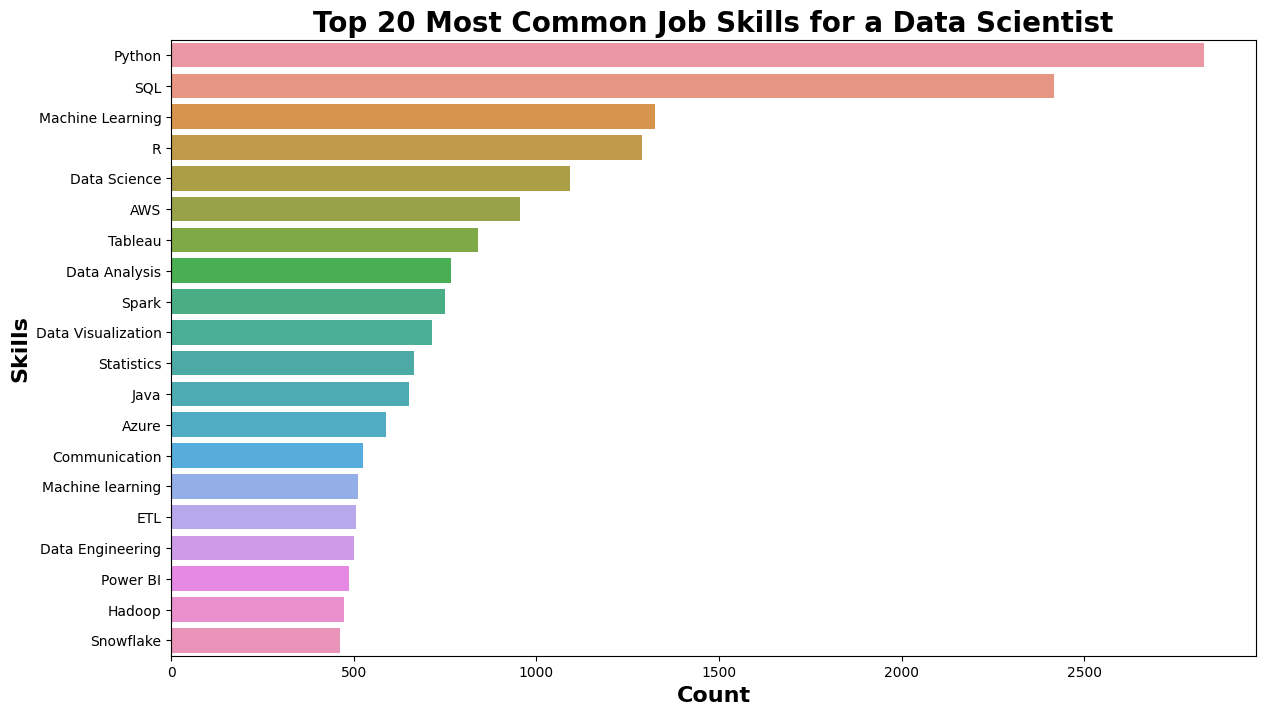

In [10]:
#Most Common Skillset For Data Scientist
df['job_skills'].astype(str)
df['Individual Skill'] = df['job_skills'].str.split(', ')
df_exploded = df.explode('Individual Skill')

skills_count = df_exploded['Individual Skill'].value_counts().reset_index()
skills_count.columns = ['Skill', 'Count']

plt.figure(figsize=(14, 8))
sns.barplot(data=skills_count.head(20), x='Count', y='Skill')
plt.title('Top 20 Most Common Job Skills for a Data Scientist', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Skills', fontsize=16, fontweight='bold')
plt.show()

****As seen in the above graph, we can conclude that if a fresher or a person who wants to switch into Data Science domain, can start learning the top skills that are posted by the Employer or in the job postings, and can start acquiring these skills.****